In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/R/Documents/datasets/Diabetes/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [7]:
data['BMI'].mean()+(1.5*data['BMI'].std())

42.763865416563746

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

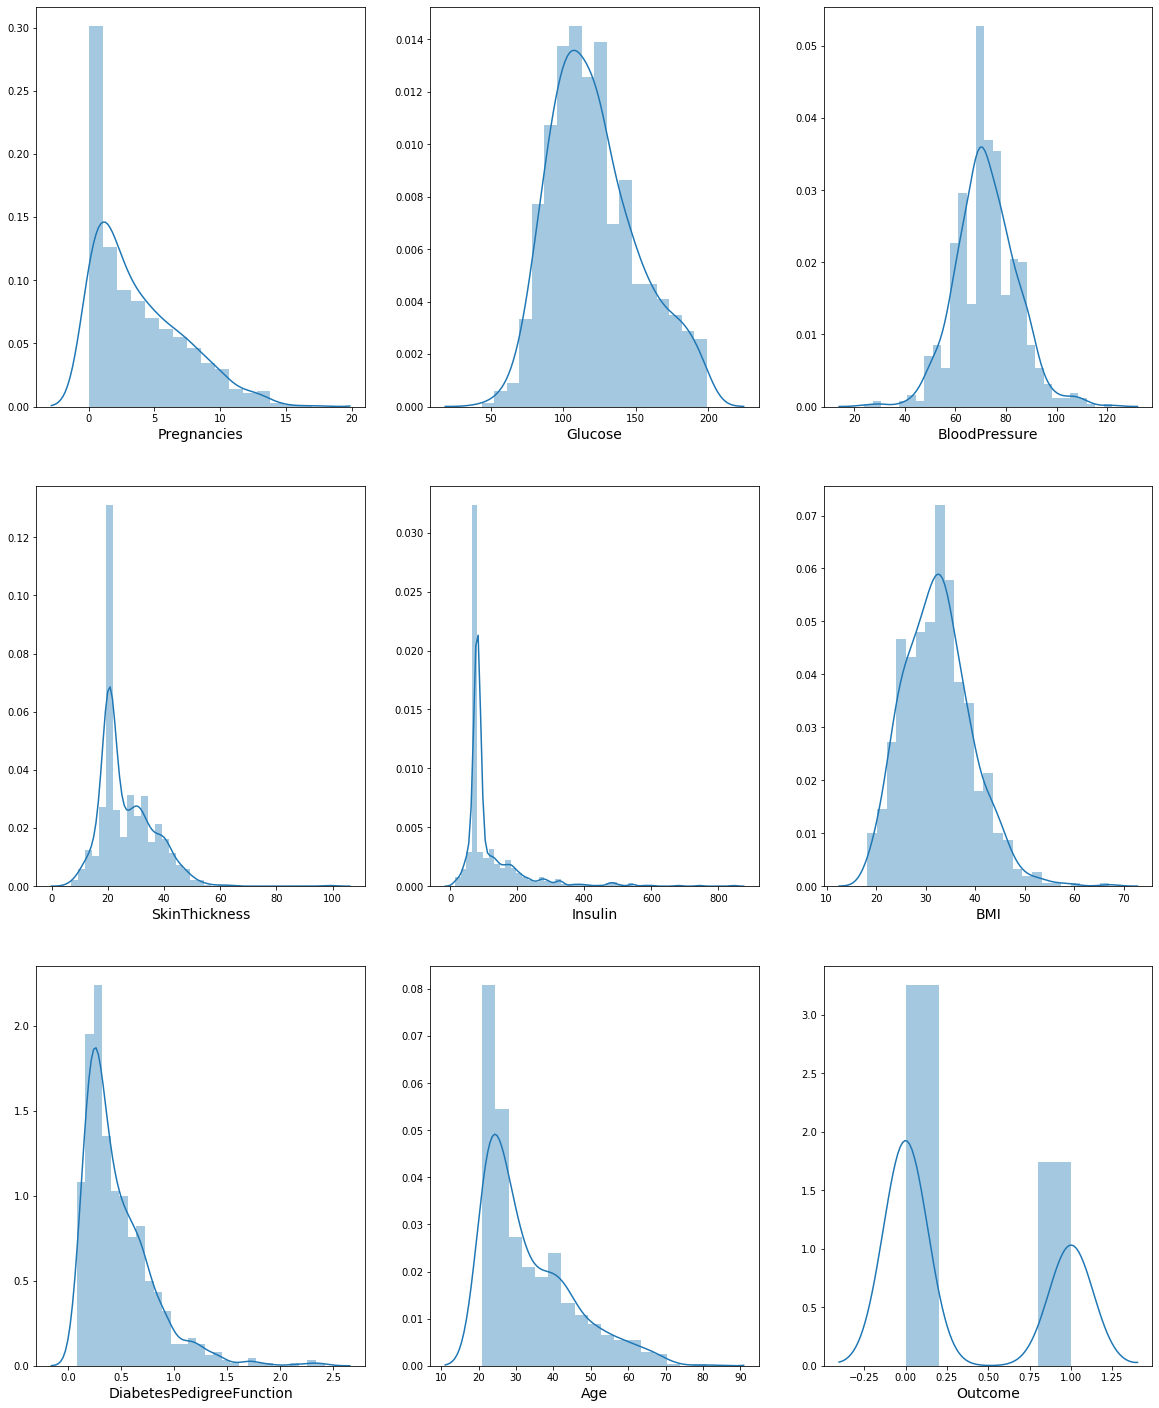

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

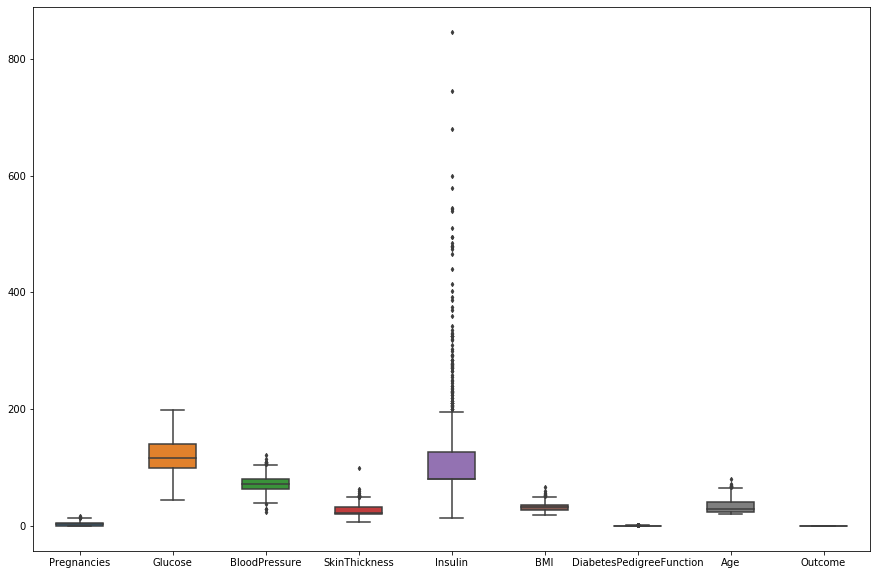

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

### Outliers treatment

As seen in the above plot, there are many outliers present in the data. So outlier treatment is done for each and every column.

#### Pregnancies column

In [11]:
data['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

From the distribution plot, we can understand data is right skewed. So following IQR based approach for ouitlier treatment.

In [12]:
IQR=data['Pregnancies'].quantile(0.75)-data['Pregnancies'].quantile(0.25)
IQR

5.0

In [13]:
lower_fence=data['Pregnancies'].quantile(0.25)-(1.5*IQR)
upper_fence=data['Pregnancies'].quantile(0.75)+(1.5*IQR)
print(lower_fence),print(upper_fence)

-6.5
13.5


(None, None)

 From above calculations, we find 13.5 to be the max boundry value. So any value beyond it would be an outlier.

In [14]:
df_treated=data.copy()
df_treated.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [15]:
df_treated.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
df_treated['Pregnancies']=np.where((df_treated['Pregnancies']>upper_fence),13,df_treated.Pregnancies)
df_treated['Pregnancies']=np.where((df_treated['Pregnancies']<0),0,df_treated.Pregnancies)

In [17]:
df_treated.loc[df_treated['Pregnancies']>13]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [18]:
df_treated.Pregnancies.describe()

count    768.000000
mean       3.834635
std        3.336808
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64

##### Blood Pressure

In [19]:
ub=data['BloodPressure'].mean()+3*data['BloodPressure'].std()
lb=data['BloodPressure'].mean()-3*data['BloodPressure'].std()
print(ub),print(lb)
type(lb)

108.60260131331626
35.90701172379312


float

In [20]:
data['BloodPressure'].mean()-3*data['BloodPressure'].std()


35.90701172379312

In [21]:
df_treated['BloodPressure']=np.where((df_treated['BloodPressure']<lb),40,df_treated.BloodPressure)
df_treated['BloodPressure']=np.where((df_treated['BloodPressure']>ub),109,df_treated.BloodPressure)

In [22]:
df_treated.loc[df_treated['BloodPressure']<lb]
#df_treated.BloodPressure.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### Skin Thickness

In [23]:
IQR_st=data['SkinThickness'].quantile(0.75)-data['SkinThickness'].quantile(0.25)
IQR_st

11.463541666666668

In [24]:
lower_fence_st=data['SkinThickness'].quantile(0.25)-(1.5*IQR)
upper_fence_st=data['SkinThickness'].quantile(0.75)+(1.5*IQR)
print(lower_fence_st),print(upper_fence_st)

13.036458333333332
39.5


(None, None)

In [25]:
df_treated['SkinThickness']=np.where((df_treated['SkinThickness']>upper_fence_st),upper_fence_st,df_treated.SkinThickness)
df_treated['SkinThickness']=np.where((df_treated['SkinThickness']<lower_fence_st),lower_fence_st,df_treated.SkinThickness)

#### Insulin

In [26]:
IQR_i=data['Insulin'].quantile(0.75)-data['Insulin'].quantile(0.25)
IQR_i

47.45052083333333

In [27]:
lower_fence_i=data['Insulin'].quantile(0.25)-(1.5*IQR)
upper_fence_i=data['Insulin'].quantile(0.75)+(1.5*IQR)
print(lower_fence_i),print(upper_fence_i)

72.29947916666667
134.75


(None, None)

In [28]:
df_treated['Insulin']=np.where((df_treated['Insulin']>upper_fence_i),upper_fence_i,df_treated.Insulin)
df_treated['Insulin']=np.where((df_treated['Insulin']<lower_fence_i),lower_fence_i,df_treated.Insulin)

#### BMI

In [29]:
df_treated.BMI.describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [30]:
ub_bmi=(data['BMI'].mean())+(1.5*data['BMI'].std())
lb_bmi=(data['BMI'].mean())-(1.5*data['BMI'].std())
print(ub_bmi),print(lb_bmi)


42.763865416563746
22.137744894308593


(None, None)

In [31]:
df_treated.loc[df_treated['BMI'] > ub_bmi, 'BMI'] = 43
df_treated.loc[df_treated['BMI'] < lb_bmi, 'BMI'] = 22

In [32]:
df_treated.BMI.describe()

count    768.000000
mean      32.229581
std        6.058373
min       22.000000
25%       27.500000
50%       32.000000
75%       36.600000
max       43.000000
Name: BMI, dtype: float64

#### Age

In [33]:
IQR_age=data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
IQR_age

17.0

In [34]:
lower_fence_age=data['Age'].quantile(0.25)-(1.5*IQR_age)
upper_fence_age=data['Age'].quantile(0.75)+(1.5*IQR_age)
print(lower_fence_age),print(upper_fence_age)

-1.5
66.5


(None, None)

In [35]:
df_treated.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [36]:
df_treated['Age']=np.where((df_treated['Age']>upper_fence_age),67,df_treated.Age)

In [37]:
df_treated.loc[df_treated['Age']>67]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


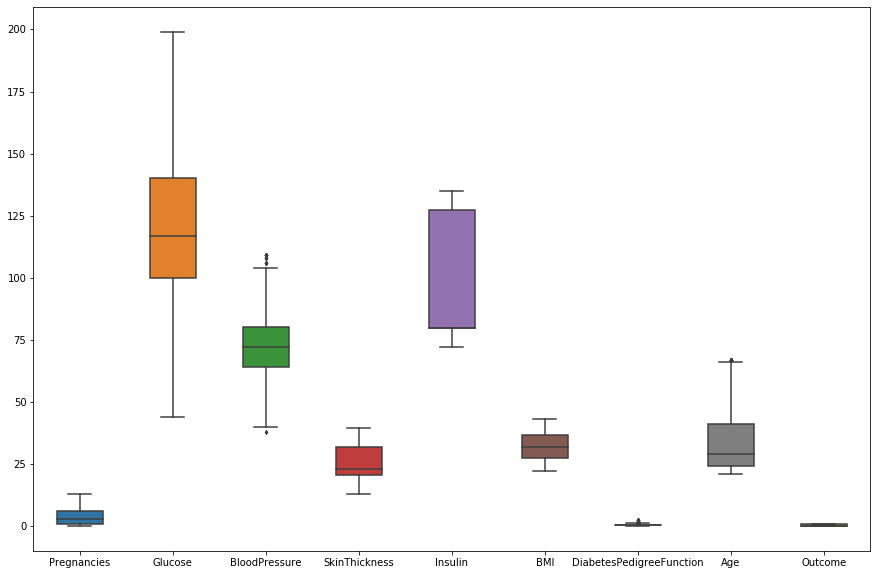

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_treated, width= 0.5,ax=ax,  fliersize=3)

In [39]:
df_treated.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Model development

#### Data selection for input and output

Treated data is splitted as input and output. The target column is checked for imbalance and treated by upsampling of least values to improve performance of the model.

In [40]:
X=df_treated.iloc[:,:-1]
y=df_treated.iloc[:,-1]

In [41]:
X.shape

(768, 8)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [54]:
rs=RandomOverSampler()
X_train_os,y_train_os=rs.fit_sample(X_train,y_train)
print("Values before oversampling :", Counter(y_train))
print("Values after oversampling :", Counter(y_train_os))

Values before oversampling : Counter({0: 358, 1: 179})
Values after oversampling : Counter({1: 358, 0: 358})


#### Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_predict_lr=lr.predict(X_test)

In [58]:
print(" Accuracy score without upsampling \n",accuracy_score(y_predict_lr,y_test))
print(" Confusion matrix before upsampling \n ", confusion_matrix(y_predict_lr,y_test))
print(" Classification report : ", classification_report(y_predict_lr,y_test))

 Accuracy score without upsampling 
 0.70995670995671
 Confusion matrix before upsampling 
  [[119  44]
 [ 23  45]]
 Classification report :                precision    recall  f1-score   support

           0       0.84      0.73      0.78       163
           1       0.51      0.66      0.57        68

    accuracy                           0.71       231
   macro avg       0.67      0.70      0.68       231
weighted avg       0.74      0.71      0.72       231



In [59]:
lr.fit(X_train_os,y_train_os)

C:\Users\R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_predict_lr_os=lr.predict(X_test)

In [66]:
print(" Accuracy score after upsampling \n",accuracy_score(y_predict_lr_os,y_test))
print(" Confusion matrix after upsampling \n ", confusion_matrix(y_predict_lr_os,y_test))
print(" Classification report:", classification_report(y_predict_lr_os,y_test))

 Accuracy score after upsampling 
 0.7012987012987013
 Confusion matrix after upsampling 
  [[99 26]
 [43 63]]
 Classification report:               precision    recall  f1-score   support

           0       0.70      0.79      0.74       125
           1       0.71      0.59      0.65       106

    accuracy                           0.70       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.70      0.70      0.70       231



#### Random Forest

In [64]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred_rf=rf.predict(X_test)

In [67]:
print(" Accuracy score without upsampling \n",accuracy_score(y_pred_rf,y_test))
print(" Confusion matrix before upsampling \n ", confusion_matrix(y_pred_rf,y_test))
print(" Classification report : ", classification_report(y_pred_rf,y_test))

 Accuracy score without upsampling 
 0.7705627705627706
 Confusion matrix before upsampling 
  [[123  34]
 [ 19  55]]
 Classification report :                precision    recall  f1-score   support

           0       0.87      0.78      0.82       157
           1       0.62      0.74      0.67        74

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.79      0.77      0.78       231



In [68]:
rf.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pred_rf_os=rf.predict(X_test)

In [71]:
print(" Accuracy score after upsampling \n",accuracy_score(y_pred_rf_os,y_test))
print(" Confusion matrix after upsampling \n ", confusion_matrix(y_pred_rf_os,y_test))
print(" Classification report:", classification_report(y_pred_rf_os,y_test))

 Accuracy score after upsampling 
 0.7748917748917749
 Confusion matrix after upsampling 
  [[119  29]
 [ 23  60]]
 Classification report:               precision    recall  f1-score   support

           0       0.84      0.80      0.82       148
           1       0.67      0.72      0.70        83

    accuracy                           0.77       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231



#### XGBoost

In [72]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [73]:
y_predict_xgb=xgb_model.predict(X_test)

In [74]:
print(" Accuracy score without upsampling \n",accuracy_score(y_predict_xgb,y_test))
print(" Confusion matrix before upsampling \n ", confusion_matrix(y_predict_xgb,y_test))
print(" Classification report : ", classification_report(y_predict_xgb,y_test))

 Accuracy score without upsampling 
 0.7532467532467533
 Confusion matrix before upsampling 
  [[121  36]
 [ 21  53]]
 Classification report :                precision    recall  f1-score   support

           0       0.85      0.77      0.81       157
           1       0.60      0.72      0.65        74

    accuracy                           0.75       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.75      0.76       231



In [75]:
xgb_model.fit(X_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [76]:
y_pred_xgb_os=xgb_model.predict(X_test)

In [77]:
print(" Accuracy score after upsampling \n",accuracy_score(y_pred_xgb_os,y_test))
print(" Confusion matrix after upsampling \n ", confusion_matrix(y_pred_xgb_os,y_test))
print(" Classification report:", classification_report(y_pred_xgb_os,y_test))

 Accuracy score after upsampling 
 0.7489177489177489
 Confusion matrix after upsampling 
  [[119  35]
 [ 23  54]]
 Classification report:               precision    recall  f1-score   support

           0       0.84      0.77      0.80       154
           1       0.61      0.70      0.65        77

    accuracy                           0.75       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [78]:
import pickle

In [81]:
with open('LR_model.sav','wb')as f:
    pickle.dump(lr,f)
with open('RF_model.sav','wb')as f:
    pickle.dump(rf,f)
with open('XGB_model.pkl','wb')as f:
    pickle.dump(xgb_model,f)

pip freeze requirements.txt